# Clustering Distance to Speed of Drivers using KMeans Clustering Algorithm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
drive = pd.read_csv("driver-data.csv")
drive.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [7]:
f1 = drive['mean_dist_day'].values
f2 = drive['mean_over_speed_perc'].values
X = np.array(list(zip(f1, f2)))

In [10]:
X

array([[ 71.24,  28.  ],
       [ 52.53,  25.  ],
       [ 64.54,  27.  ],
       ...,
       [170.91,  12.  ],
       [176.14,   5.  ],
       [168.03,   9.  ]])

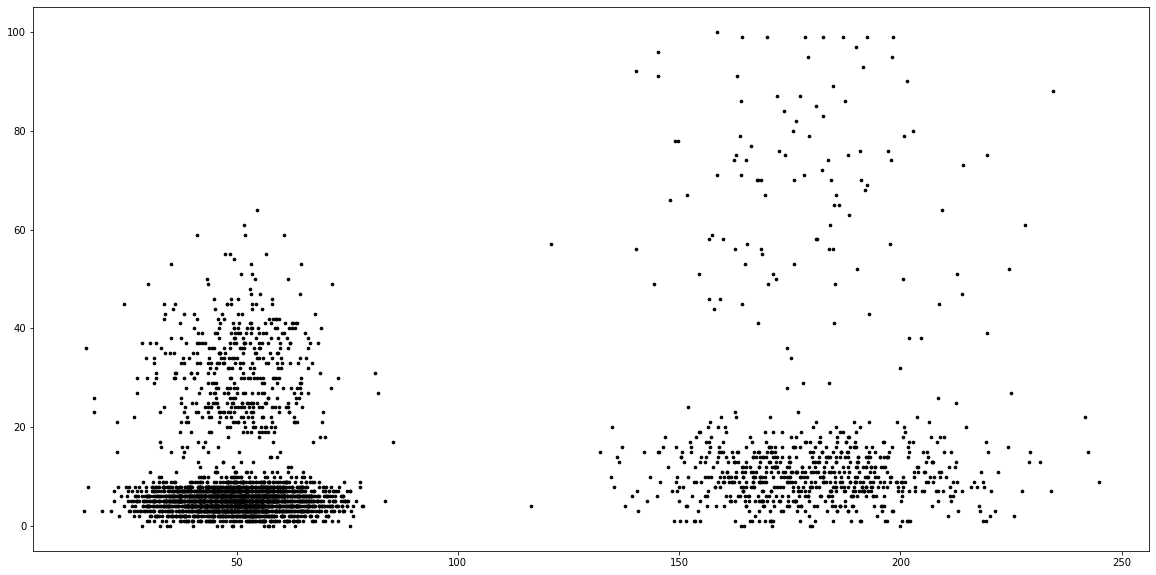

In [12]:
plt.figure(figsize=(20,10))
plt.scatter(f1, f2, c='black', s=7)

## Assumed number of clusters is 4 with raw data 

In [15]:
demo = drive.drop('id', axis=1)

In [16]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mean_dist_day         4000 non-null   float64
 1   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 62.6 KB


In [17]:
demo.skew()

mean_dist_day           1.490008
mean_over_speed_perc    3.218771
dtype: float64

In [18]:
demo.corr()

,mean_dist_day,mean_over_speed_perc
mean_dist_day,1.000000,0.266897
mean_over_speed_perc,0.266897,1.000000


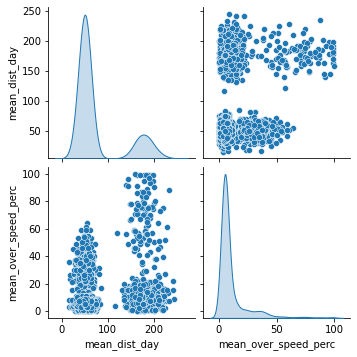

In [19]:
sns.pairplot(demo, diag_kind="kde")

## Normalizing skewness using Power-Transformation 

In [27]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
pt = PowerTransformer()
normaldemo = pd.DataFrame(pt.fit_transform(demo))
normaldemo.columns = demo.columns

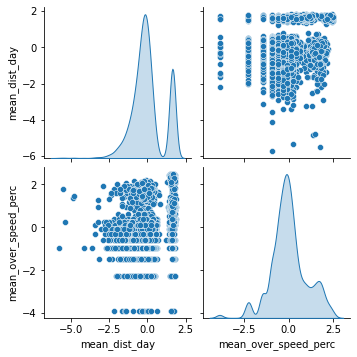

In [28]:
sns.pairplot(normaldemo, diag_kind="kde")

In [26]:
normaldemo.skew()

0    0.059185
1   -0.051231
dtype: float64

## Looking for most relevant number of clusters with Interia value 

In [54]:
from sklearn.cluster import KMeans
c1 = normaldemo['mean_dist_day'].values
c2 = normaldemo['mean_over_speed_perc'].values
cluster_error = []
cluster_label = []
cluster_centroids = []
cluster_num = range(2,10)
for num in cluster_num:
    clust = KMeans(num, n_init=3)
    clust.fit(normaldemo)
    cluster_error.append(clust.inertia_)
    cluster_label.append(clust.labels_)
    cluster_centroids.append(clust.cluster_centers_)
clustering_table = pd.DataFrame({"Number_of_cluster" : cluster_num, "Inertia" : cluster_error})
clustering_table
    

,Number_of_cluster,Inertia
0,2,4620.410898
1,3,3332.400538
2,4,2503.687873
3,5,1880.756356
4,6,1627.622690
5,7,1345.395150
6,8,1177.467358
7,9,1077.535743


## Elbow plot of Number of clusters against Inertia 

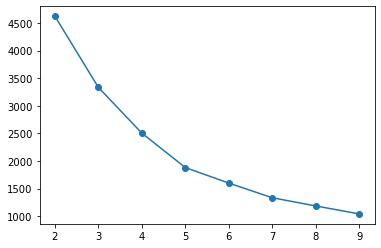

In [37]:
plt.plot(clustering_table.Number_of_cluster,clustering_table.Inertia,marker='o')

### There is a significant change in value from 5-6 hence decomposing to 6 clusters

In [39]:
clust = KMeans(n_clusters=6)

In [41]:
clust.fit(normaldemo)

KMeans(n_clusters=6)

In [42]:
clust.transform(normaldemo)

array([[1.92132603, 1.24807632, 1.59239523, 3.57674475, 2.62342461,
        0.85286853],
       [1.71249131, 1.89816495, 2.06478126, 3.44919015, 2.12748888,
        0.24070135],
       [1.8350889 , 1.43808163, 1.71603684, 3.5242479 , 2.467684  ,
        0.66245612],
       ...,
       [2.00120225, 1.36603089, 0.27695075, 3.13898561, 3.12421062,
        2.15144891],
       [1.77003005, 2.39343294, 0.75215446, 2.32700419, 2.9695736 ,
        2.75420485],
       [1.85209442, 1.68756076, 0.06330495, 2.85836639, 3.01869348,
        2.28958744]])

In [46]:
labelprediction = pd.DataFrame(clust.predict(normaldemo))

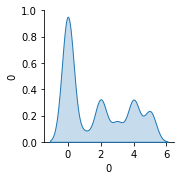

In [49]:
sns.pairplot(labelprediction, diag_kind="kde")

In [55]:
clust.cluster_centers_

array([[-0.04100678, -0.03061664],
       [ 1.63628806,  0.42884093],
       [-0.03815079, -0.86684907],
       [-2.25197771, -0.18400061],
       [-0.87954205, -0.02898109],
       [-0.33322946,  1.6091122 ],
       [ 1.6215201 ,  2.02787924],
       [-0.9043934 , -0.95305148],
       [ 0.38411522, -2.51506727]])

In [57]:
drive['Cluster_Label'] = clust.labels_

## Cluster_Label denotes the cluster each observations are identified 

In [58]:
drive.head()

,id,mean_dist_day,mean_over_speed_perc,Cluster_Label
0,3423311935,71.24,28,5
1,3423313212,52.53,25,5
2,3423313724,64.54,27,5
3,3423311373,55.69,22,5
4,3423310999,54.58,25,5


## Visualisation of clusters with pairplot

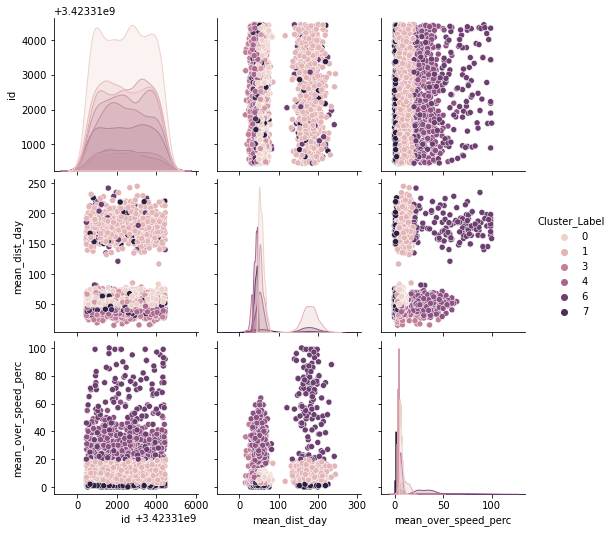

In [60]:
sns.pairplot(drive, diag_kind="kde", hue="Cluster_Label")